# Exercise 5: Model selection, evaluation, and assessment


## Exercises

1. Use cross-validation to evaluate the performance of a $k$-nearest neighbors (KNN) model trained on the iris dataset. Vary the number of neighbors and compare the resulting cross-validation scores. Which value of $k$ gives the best performance?
2. Train different models, KNN, logistic regression, and decission tree on the iris dataset and compare their performance using accuracy and a confusion matrix. Which model performs best?
3. Perform $k$-fold cross-validation on the iris data and compare the performance of several models such as KNN, decision trees, and logistic regression. Which model performs best?
4. Train a decision tree on the iris dataset. Use `GridSearchCV` to find the best hyperparameters for `max_depth`, `min_samples_leaf`, and `min_samples_split`. What is the model accuracy with optimized hyperparameters?
5. Have a look at: [Scikit-learn: ROC curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) and [Scikit-learn: Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)


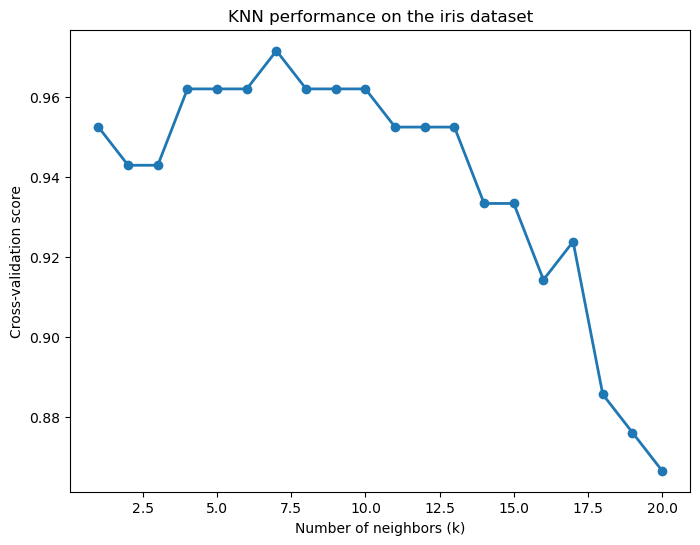

Optimal number of neighbors: 7
Test set accuracy: 0.956


In [5]:
# Solution 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y,
            test_size=0.3, random_state=5)

# Define a range of neighbor values
k_values = range(1, 21)

# Compute the cross-validation scores for each value of k
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(np.mean(scores))

# Plot the cross-validation scores
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(k_values, cv_scores, '-o', lw=2)
ax.set_xlabel('Number of neighbors (k)')
ax.set_ylabel('Cross-validation score')
ax.set_title('KNN performance on the iris dataset')
plt.show()

# Find the optimal value of k
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal number of neighbors: {optimal_k}')

# Evaluate the KNN model on the testing set
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f'Test set accuracy: {test_score:.3f}')

In [6]:
# Solution 2

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define the models to be compared
models = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(max_iter=1000)]
model_names = ["KNN", "Decision Tree", "Logistic Regression"]

# Loop over the models
for i, model in enumerate(models):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics for this model
    print("\nModel: {}".format(model_names[i]))
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Confusion Matrix:\n", cm)


Model: KNN
Accuracy: 95.56%
Confusion Matrix:
 [[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]

Model: Decision Tree
Accuracy: 95.56%
Confusion Matrix:
 [[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]

Model: Logistic Regression
Accuracy: 93.33%
Confusion Matrix:
 [[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [7]:
# Solution 3

from sklearn.model_selection import KFold


# Define the models to be compared
models = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(max_iter=1000)]
model_names = ["KNN", "Decision Tree", "Logistic Regression"]

# Perform k-fold cross-validation
k = 10
kf = KFold(n_splits=k)

# Initialize arrays to store the accuracy scores for each model
accuracies = np.zeros((len(models), k))

# Loop over the models
for i, model in enumerate(models):
    j = 0
    # Loop over the folds
    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

        # Fit the model on the training data for this fold
        model.fit(X_train_kf, y_train_kf)

        # Evaluate the model on the validation data for this fold
        y_pred = model.predict(X_val_kf)
        accuracy = accuracy_score(y_val_kf, y_pred)
        accuracies[i, j] = accuracy
        j += 1

# Print the average accuracy scores for each model
for i, model in enumerate(model_names):
    print("{}: {:.2f}%".format(model, np.mean(accuracies[i, :]) * 100))

KNN: 96.18%
Decision Tree: 95.18%
Logistic Regression: 96.18%


In [8]:
# Solution 4

import pandas as pd
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for the decision tree
param_grid = {"max_depth": [2, 3, 4, 5, 6, None],
              "min_samples_split": [2, 3, 4, 5, 6],
              "min_samples_leaf": [1, 2, 3, 4, 5]}

# Initialize the decision tree model
dt = DecisionTreeClassifier()

# Perform grid search to tune the hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=20, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance of the best model on the test data
dt_best = grid_search.best_estimator_
y_pred = dt_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(accuracy * 100))


Best hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy: 93.33%
